In [53]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#build model file
import joblib

# Ignore warnings
import warnings

warnings.filterwarnings('ignore')

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [54]:
df = pd.read_csv("cleaned_data.csv")

In [55]:
df.head()

,model,price,rating,os,sim_type,network_type,VoLTE,NFC,ir_blaster,chipset,...,resolution,refresh_rate_hz,display_type,rear_camera_mp_list,rear_camera_count,rear_camera_max_mp,front_camera_mp,memory_card_supported,memory_card_type,memory_card_max_gb
0,oneplus 11 5g,54999,89.0,Android v13,Dual,5g,True,True,False,Snapdragon 8 Gen2,...,1440x3216,120.0,Punch Hole,"[50, 48, 32]",3,50.0,16.0,1,NaN,NaN
1,oneplus nord ce 2 lite 5g,19989,81.0,Android v12,Dual,5g,True,False,False,Snapdragon 695,...,1080x2412,120.0,Punch Hole,"[64, 2, 2]",3,64.0,16.0,1,Hybrid,1024.0
2,samsung galaxy a14 5g,16499,75.0,Android v13,Dual,5g,True,False,False,Exynos 1330,...,1080x2408,90.0,Water Drop Notch,"[50, 2, 2]",3,50.0,13.0,1,Dedicated,1024.0
3,motorola moto g62 5g,14999,81.0,Android v12,Dual,5g,True,False,False,Snapdragon 695,...,1080x2400,120.0,Punch Hole,"[50, 8, 2]",3,50.0,16.0,1,Hybrid,1024.0
4,realme 10 pro plus,24999,82.0,Android v13,Dual,5g,True,False,False,Dimensity 1080,...,1080x2412,120.0,Punch Hole,"[108, 8, 2]",3,108.0,16.0,1,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model                  968 non-null    object 
 1   price                  968 non-null    int64  
 2   rating                 968 non-null    float64
 3   os                     942 non-null    object 
 4   sim_type               968 non-null    object 
 5   network_type           968 non-null    object 
 6   VoLTE                  968 non-null    bool   
 7   NFC                    968 non-null    bool   
 8   ir_blaster             968 non-null    bool   
 9   chipset                968 non-null    object 
 10  core_type              962 non-null    object 
 11  clock_ghz              927 non-null    float64
 12  ram_gb                 968 non-null    int64  
 13  storage_gb             968 non-null    int64  
 14  battery_mah            957 non-null    float64
 15  fast_c

In [57]:
#drop memory card supported column
df.drop("memory_card_supported", axis=1, inplace=True)

In [58]:
df.isnull().sum()

model                    0
price                    0
rating                   0
os                      26
sim_type                 0
network_type             0
VoLTE                    0
NFC                      0
ir_blaster               0
chipset                  0
core_type                6
clock_ghz               41
ram_gb                   0
storage_gb               0
battery_mah             11
fast_charge_w          204
screen_size_in           1
resolution               1
refresh_rate_hz        360
display_type            85
rear_camera_mp_list      0
rear_camera_count        0
rear_camera_max_mp      16
front_camera_mp         25
memory_card_type       127
memory_card_max_gb     468
dtype: int64

In [59]:
df.describe()

,price,rating,clock_ghz,ram_gb,storage_gb,battery_mah,fast_charge_w,screen_size_in,refresh_rate_hz,rear_camera_count,rear_camera_max_mp,front_camera_mp,memory_card_max_gb
count,968.000000,968.000000,927.000000,968.000000,968.000000,957.000000,764.00000,967.000000,608.000000,968.000000,952.000000,943.000000,500.000000
mean,32745.954545,78.540289,2.430237,7.641529,7.641529,4819.935214,46.25877,6.535998,111.656250,2.268595,50.737395,16.714740,741.136000
std,39707.710721,6.953266,0.464864,23.123619,23.123619,1012.724563,34.30833,0.381498,18.488393,0.905096,33.209502,10.889245,375.426488
min,2999.000000,60.000000,1.000000,1.000000,1.000000,1500.000000,10.00000,2.400000,90.000000,0.000000,2.000000,2.000000,32.000000
25%,12999.000000,75.000000,2.050000,4.000000,4.000000,4500.000000,18.00000,6.500000,90.000000,1.000000,48.000000,8.000000,512.000000
50%,19999.000000,80.000000,2.360000,6.000000,6.000000,5000.000000,33.00000,6.580000,120.000000,3.000000,50.000000,16.000000,1024.000000
75%,35992.250000,84.000000,2.840000,8.000000,8.000000,5000.000000,66.00000,6.670000,120.000000,3.000000,64.000000,16.000000,1024.000000
max,650000.000000,89.000000,3.220000,512.000000,512.000000,22000.000000,240.00000,8.030000,240.000000,4.000000,200.000000,60.000000,2048.000000


In [60]:
#extracting the brand of the phone from model column
df["brand"] = df["model"].str.split(" ").str[0]
df.drop("model", axis=1, inplace=True)

In [61]:
#extracting the chipset from chipset column
df["chipset"] = df["chipset"].str.split(" ").str[0]

In [62]:
#handling the rear_camera_mp_list column
import ast

df["rear_camera_mp_list"] = df["rear_camera_mp_list"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
df["rear_camera_sum_mp"] = df["rear_camera_mp_list"].apply(
    lambda x: sum(x) if isinstance(x, list) else x
)
df.drop("rear_camera_mp_list", axis=1, inplace=True)

In [63]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

In [64]:
#impute missing values
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

In [65]:
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [66]:
df.isnull().sum()

price                 0
rating                0
os                    0
sim_type              0
network_type          0
VoLTE                 0
NFC                   0
ir_blaster            0
chipset               0
core_type             0
clock_ghz             0
ram_gb                0
storage_gb            0
battery_mah           0
fast_charge_w         0
screen_size_in        0
resolution            0
refresh_rate_hz       0
display_type          0
rear_camera_count     0
rear_camera_max_mp    0
front_camera_mp       0
memory_card_type      0
memory_card_max_gb    0
brand                 0
rear_camera_sum_mp    0
dtype: int64

In [67]:
correlation = df[num_cols].corr()
correlation

,price,rating,clock_ghz,ram_gb,storage_gb,battery_mah,fast_charge_w,screen_size_in,refresh_rate_hz,rear_camera_count,rear_camera_max_mp,front_camera_mp,memory_card_max_gb,rear_camera_sum_mp
price,1.000000,0.264426,0.440099,0.013694,0.013694,-0.157661,0.180568,0.107290,0.203513,0.055291,0.083200,0.174864,0.176299,0.163763
rating,0.264426,1.000000,0.533009,0.086529,0.086529,-0.032747,0.438764,0.157394,0.125911,0.265791,0.464838,0.514883,0.330963,0.519785
clock_ghz,0.440099,0.533009,1.000000,-0.064976,-0.064976,-0.034214,0.525381,0.297188,0.239130,0.253308,0.261828,0.369275,0.356398,0.381252
ram_gb,0.013694,0.086529,-0.064976,1.000000,1.000000,-0.129557,0.045638,-0.426587,0.036238,-0.061358,0.015081,0.057859,-0.007081,-0.008260
storage_gb,0.013694,0.086529,-0.064976,1.000000,1.000000,-0.129557,0.045638,-0.426587,0.036238,-0.061358,0.015081,0.057859,-0.007081,-0.008260
battery_mah,-0.157661,-0.032747,-0.034214,-0.129557,-0.129557,1.000000,-0.032664,0.334515,-0.011230,0.047370,0.152726,-0.015795,0.081481,0.130473
fast_charge_w,0.180568,0.438764,0.525381,0.045638,0.045638,-0.032664,1.000000,0.200040,0.275007,0.258137,0.403013,0.401924,0.188711,0.486605
screen_size_in,0.107290,0.157394,0.297188,-0.426587,-0.426587,0.334515,0.200040,1.000000,0.035364,0.160816,0.281349,0.157385,0.113090,0.293120
refresh_rate_hz,0.203513,0.125911,0.239130,0.036238,0.036238,-0.011230,0.275007,0.035364,1.000000,0.028018,0.032788,0.101284,0.057486,0.101731
rear_camera_count,0.055291,0.265791,0.253308,-0.061358,-0.061358,0.047370,0.258137,0.160816,0.028018,1.000000,0.148153,0.235989,0.198690,0.369662


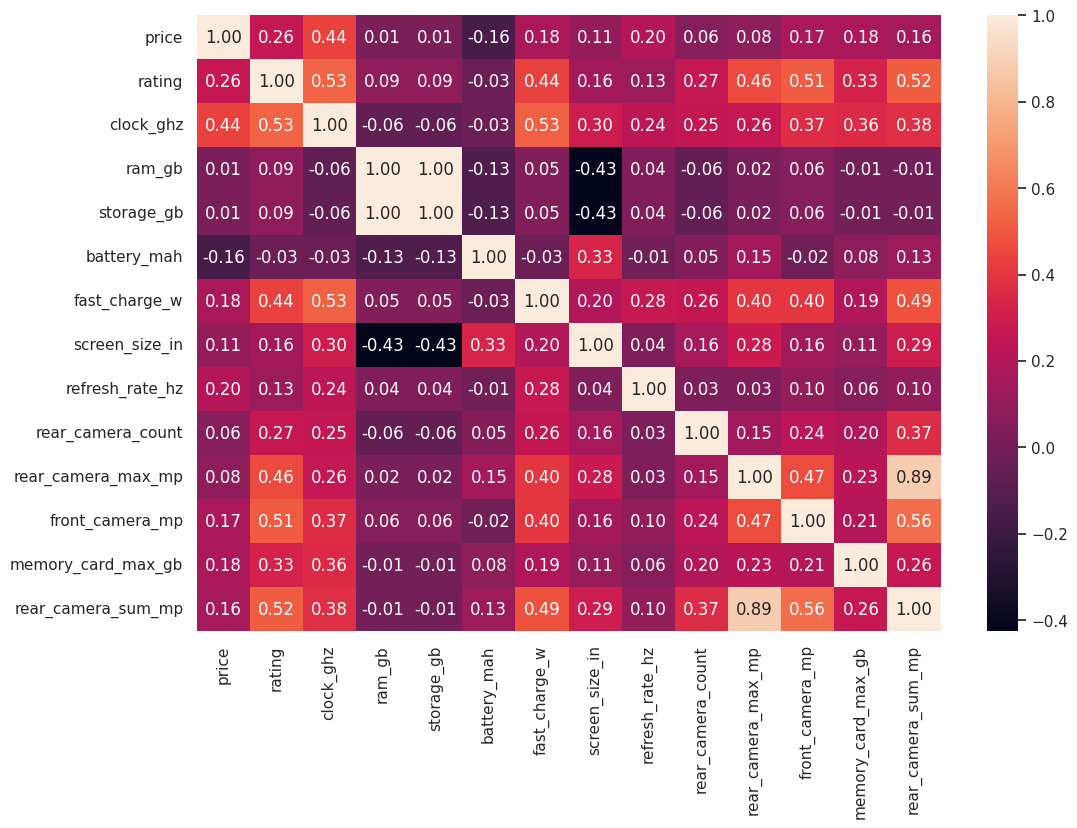

In [68]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.show()

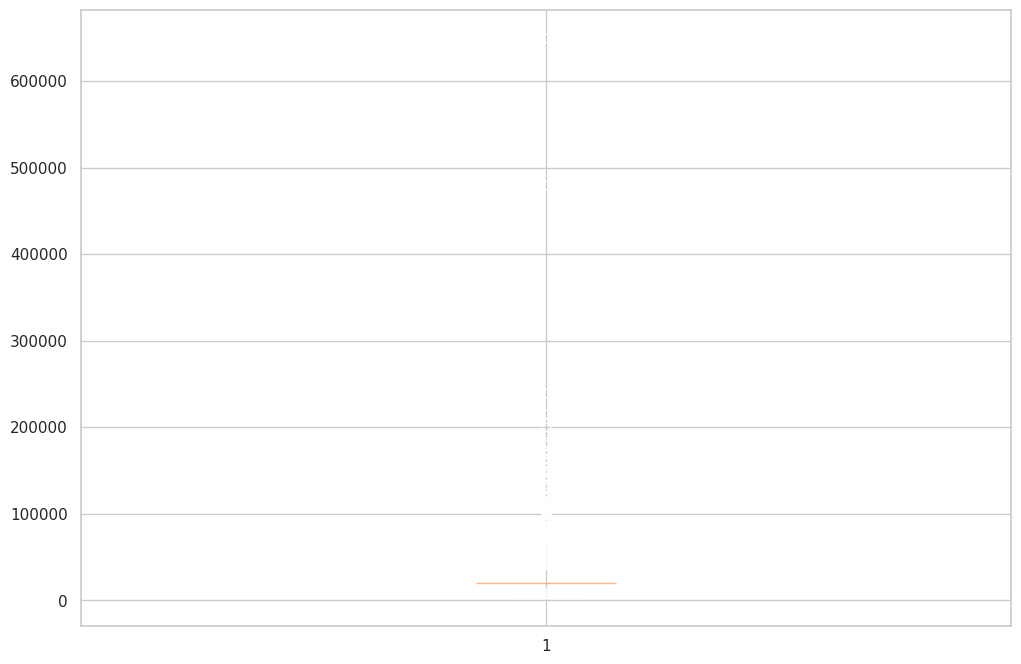

In [69]:
plt.figure(figsize=(12, 8))
plt.boxplot(df["price"])
plt.show()

In [70]:
# drop top 10% of the price
df = df[df["price"] < df["price"].quantile(0.9)]

In [87]:
df.shape

(871, 26)

In [71]:
#per categorical column unique values
df[cat_cols].nunique()

os                  28
sim_type             2
network_type         2
chipset             21
core_type            4
resolution          61
display_type         5
memory_card_type     2
brand               42
dtype: int64

In [72]:
#uniques
for col in ["sim_type","network_type","core_type","memory_card_type"]:
    print(df[col].unique())

['Dual' 'Single']
['5g' '4g']
['Octa Core' 'Hexa Core' 'Quad Core' 'Dual Core']
['Dedicated' 'Hybrid']


In [73]:
#encoding cat cols
#label encoding column [os,chipset,resolution,display_type,brand]
label_encoder = LabelEncoder()
for col in ["os","chipset","resolution","display_type","brand"]:
    df[col] = label_encoder.fit_transform(df[col])

In [74]:
#ordinal encoding column [network_type,core_type]
network_order = ["4g", "5g"]
core_order = ["Dual Core", "Quad Core", "Hexa Core", "Octa Core"]

encoder = OrdinalEncoder(
    categories=[network_order, core_order]
)

df[["network_type", "core_type"]] = encoder.fit_transform(
    df[["network_type", "core_type"]]
)

In [75]:
#onehot encoding of columns [sim_type,memory_card_type]
encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)

encoded_array = encoder.fit_transform(df[["sim_type", "memory_card_type"]])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(["sim_type", "memory_card_type"]),
    index=df.index
)

df = df.drop(["sim_type", "memory_card_type"], axis=1)

df = pd.concat([df, encoded_df], axis=1)

In [76]:
#splitting the data
X = df.drop("price", axis=1)
y = df["price"]

In [77]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
#scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
#building the model
linearReg = LinearRegression()
linearReg.fit(X_train_scaled,y_train)

linerRegPredict = linearReg.predict(X_test)

In [80]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train_scaled,y_train)

logisticRegPredict = logisticReg.predict(X_test_scaled)

In [81]:
#liner reg matrix
print("MAE:",mean_absolute_error(y_test,linerRegPredict))
print("MSE:",mean_squared_error(y_test,linerRegPredict))
print("RMSE:",np.sqrt(mean_squared_error(y_test,linerRegPredict)))
print("R2:",r2_score(y_test,linerRegPredict))

MAE: 1155378.0017518303
MSE: 1365633257384.0754
RMSE: 1168603.1222720891
R2: -7388.47285491596


In [82]:
#logistic reg matrix
print("MAE:",mean_absolute_error(y_test,logisticRegPredict))
print("MSE:",mean_squared_error(y_test,logisticRegPredict))
print("RMSE:",np.sqrt(mean_squared_error(y_test,logisticRegPredict)))
print("R2:",r2_score(y_test,logisticRegPredict))

MAE: 5548.182857142857
MSE: 87027024.77714285
RMSE: 9328.827620721848
R2: 0.5290947743417962


In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42
)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

from sklearn.metrics import r2_score
print("MAE:", mean_absolute_error(y_test,pred))
print("MSE:", mean_squared_error(y_test,pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))
print("R2:", r2_score(y_test, pred))

MAE: 3754.3261849659866
MSE: 46751639.299171135
RMSE: 6837.517041965682
R2: 0.747025808242391


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    loss="huber",
    learning_rate=0.05,
    n_estimators=100,
    max_depth=7,
    random_state=42
)

gbr.fit(X_train_scaled,y_train)

gbrPredict = gbr.predict(X_test_scaled)
#model eval
print("MAE:",mean_absolute_error(y_test,gbrPredict))
print("MSE:",mean_squared_error(y_test,gbrPredict))
print("RMSE:",np.sqrt(mean_squared_error(y_test,gbrPredict)))
print("R2:",r2_score(y_test,gbrPredict))

MAE: 3782.5702301340375
MSE: 46810590.75741022
RMSE: 6841.826565867496
R2: 0.7467068205507394


In [85]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(
    estimator=RandomForestRegressor(n_estimators=100),
    n_estimators=100,
    random_state=42
)
br.fit(X_train,y_train)
brpredict = br.predict(X_test)
print("MAE:",mean_absolute_error(y_test,brpredict))
print("MSE:",mean_squared_error(y_test,brpredict))
print("RMSE:",np.sqrt(mean_squared_error(y_test,brpredict)))
print("R2:",r2_score(y_test,brpredict))

MAE: 3755.8604132854352
MSE: 46706474.766695455
RMSE: 6834.213544124551
R2: 0.7472701945627515


In [86]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor(
    estimator=RandomForestRegressor(n_estimators=100),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
adr.fit(X_train,y_train)
adrPredict = adr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,adrPredict))
print("MSE:",mean_squared_error(y_test,adrPredict))
print("RMSE:",np.sqrt(mean_squared_error(y_test,adrPredict)))
print("R2:",r2_score(y_test,adrPredict))


MAE: 3726.4474582766443
MSE: 43486319.2864728
RMSE: 6594.415765363357
R2: 0.7646945296695977
